# Exploratory data analysis
In the following, I will start looking at the different features in the data set. 
% explain this more as you develop.
This is either a classification or ordinal regression problem. We will try both approaches and compare. 

First hypothesis: A key predictor of building damage will be the materials it is built from. 
Second hypothesis: A key predictor of building damage will be the proximity to the epicentre of the quake, though this may be hard to test, need to verify if there is any data available for this purpose. 


In [1]:
# import libraries 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})

# import training data 
path_to_train="/Users/luke_dev/Documents/data_science_projects/Richter_Predictor_Modeling_Earthquake_Damage/data/train_values.csv"
path_to_train_labels="/Users/luke_dev/Documents/data_science_projects/Richter_Predictor_Modeling_Earthquake_Damage/data/train_labels.csv"
train_data_raw=pd.read_csv(path_to_train)
train_data_labels=pd.read_csv(path_to_train_labels) # true results of damage grading 

In [2]:
# data cleaning 
# checking for missing values in each feature 
train_data_raw.isnull().sum() # check by feature 

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [3]:
# data cleaning 
train_data_raw.isnull().sum().sum() # check for whole data set 


0

In [4]:
# data cleaning 
train_data_labels.isnull().sum() # check label results 

building_id     0
damage_grade    0
dtype: int64

Text(0, 0.5, 'building material')

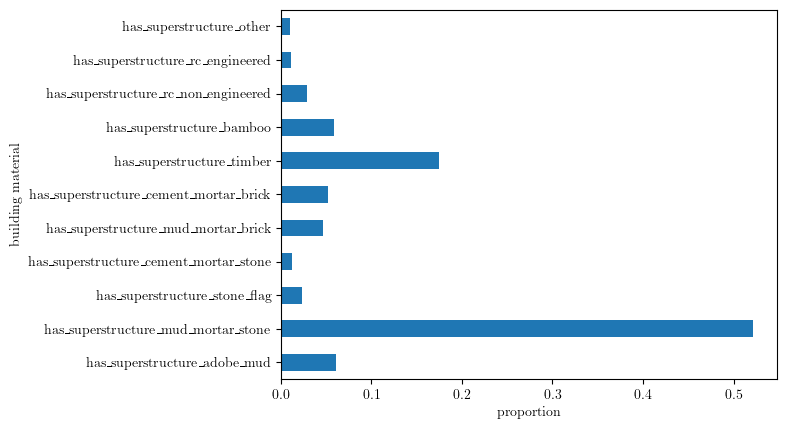

In [5]:
# group together all possible building strcutures 
building_struct_features=train_data_raw.loc[:,['has_superstructure' in i for i in train_data_raw.columns]]
counts_of_each_struct= building_struct_features.sum()/building_struct_features.sum().sum() # normalised proportions of each strcutre 

# bar chart of relative proportions of each building material 
ax=counts_of_each_struct.plot.barh(building_struct_features.columns,counts_of_each_struct)
ax.set_xlabel("proportion")
ax.set_ylabel("building material")


Text(0, 0.5, 'Secondary use')

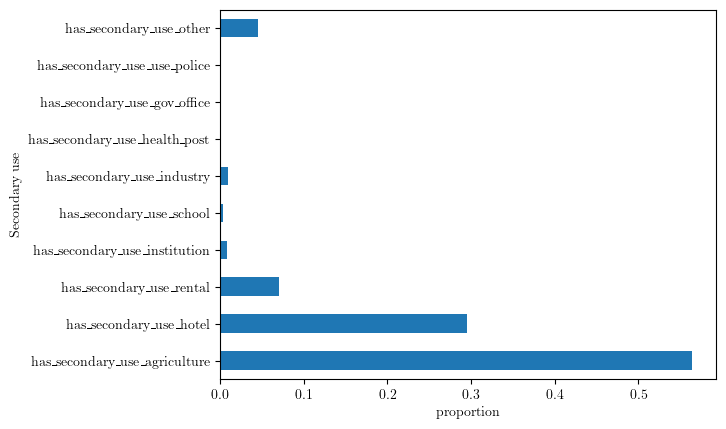

In [6]:
# grouping together all secondary uses
secondary_use_features=train_data_raw.loc[:,['has_secondary_use_' in i for i in train_data_raw.columns]]
counts_of_each_secondary_use= secondary_use_features.sum()/secondary_use_features.sum().sum()
# bar chart of relative proportions of each building material 
ax=counts_of_each_secondary_use.plot.barh(secondary_use_features.columns,counts_of_each_secondary_use)
ax.set_xlabel("proportion")
ax.set_ylabel("Secondary use")

In [7]:
# need to look at the categorical variables next 